# The Spark Foundation
### Task-01 : Prediction using Supervised ML

##### Task Statement 
- Predict the percentage of an student based on no.of study hours
- This is simple Linear Regression task as it involves just 2 variables
- What will be predicted score if a student studies for 9.25 hrs/day ?

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Libraries package
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

### Read the Data

In [3]:
# Read the given CSV file, and view some sample records

df = pd.read_csv(r"D:\Downloads\deeksha0117\Spark Assignment 1.csv")
df.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Understanding

In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Write your code for column-wise null count here
df.isnull().sum(axis=0)

Hours     0
Scores    0
dtype: int64

- No null values found in the dataset

### Data Visualization

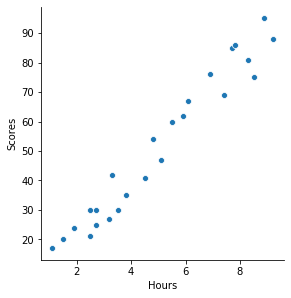

In [8]:
sns.pairplot(df, x_vars=['Hours'], y_vars='Scores',size=4, aspect=1, kind='scatter')
plt.show()

- As the number of hours increases scores also increases

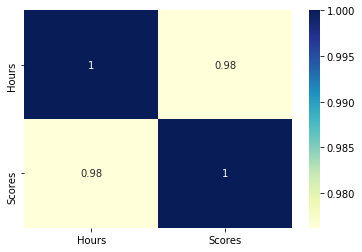

In [9]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>


In our case:

$y = c + m_1 \times Scores$

The $m$ values are called the model **coefficients** or **model parameters**.



### Model Building
- We first assign the feature variable, `Hours`, in this case, to the variable `X` and the response variable, `Scores`, to the variable `y`.

In [10]:
X = df['Hours']
y = df['Scores']

#### Train-Test Split

Now we need to split our variable into training and testing sets. We'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
# Let's now take a look at the train dataset

X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [13]:
y_test.head()

9     25
22    35
13    42
11    62
5     20
Name: Scores, dtype: int64

#### Building a Linear Model

We first need to import the `statsmodel.api` library using which we'll perform the linear regression.

In [14]:
import statsmodels.api as sm

- By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, we need to manually use the `add_constant` attribute of `statsmodels`. And once we've added the constant to our `X_train` dataset, we can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [15]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [16]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [17]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.15e-11
Time:                        23:53:15   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

- The R-Squared and adjusted R-squared have approximately the same value
- The P-value is least


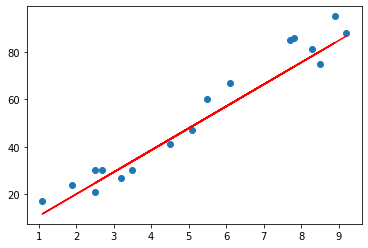

In [18]:
# For 9.25 hours/day data will look like
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951 + 9.25*X_train, 'r')
plt.show()

- Predictions on the Test Set
    Now that we have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the `X_test` data like we did for `X_train` and then we can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [19]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [20]:
y_pred.head()

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
dtype: float64

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [22]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5.067387845160841

###### Checking the R-squared on the test set

In [23]:
# Predicted Score of students if sudies for 9.25 hours/day
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687439

##### Visualizing the fit on the test set

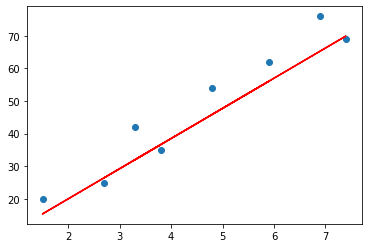

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test,1.4951 + 9.25* X_test, 'r')
plt.show()

#### Conclusion
- Predicted (test-data) score for student who studied for 9.25 hours/day will be 93.09 %.